# Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Project/Stroke Predication/healthcare-dataset-stroke-data.csv')

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [10]:
df.drop('id',axis=1,inplace=True)

In [11]:
for col in df.columns:
    print(f'Column :{col}')
    print(df[col].value_counts())
    print('___________-')

Column :gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
___________-
Column :age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
___________-
Column :hypertension
0    4612
1     498
Name: hypertension, dtype: int64
___________-
Column :heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64
___________-
Column :ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
___________-
Column :work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
___________-
Column :Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
___________-
Column :avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1


**Missing Values in Bmi**

In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Data Visualization

**Categorical Features**

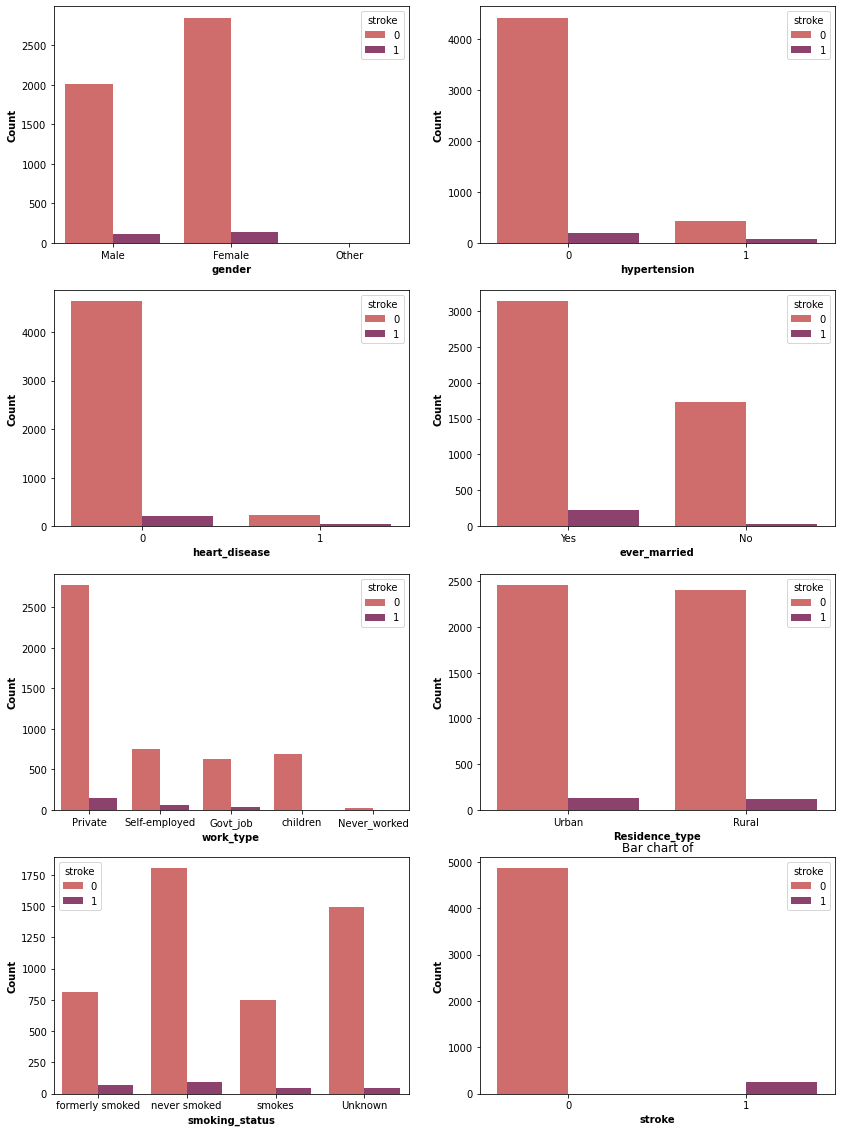

In [13]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=df, ax=axs[i], hue =df['stroke'], palette = 'flare')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')


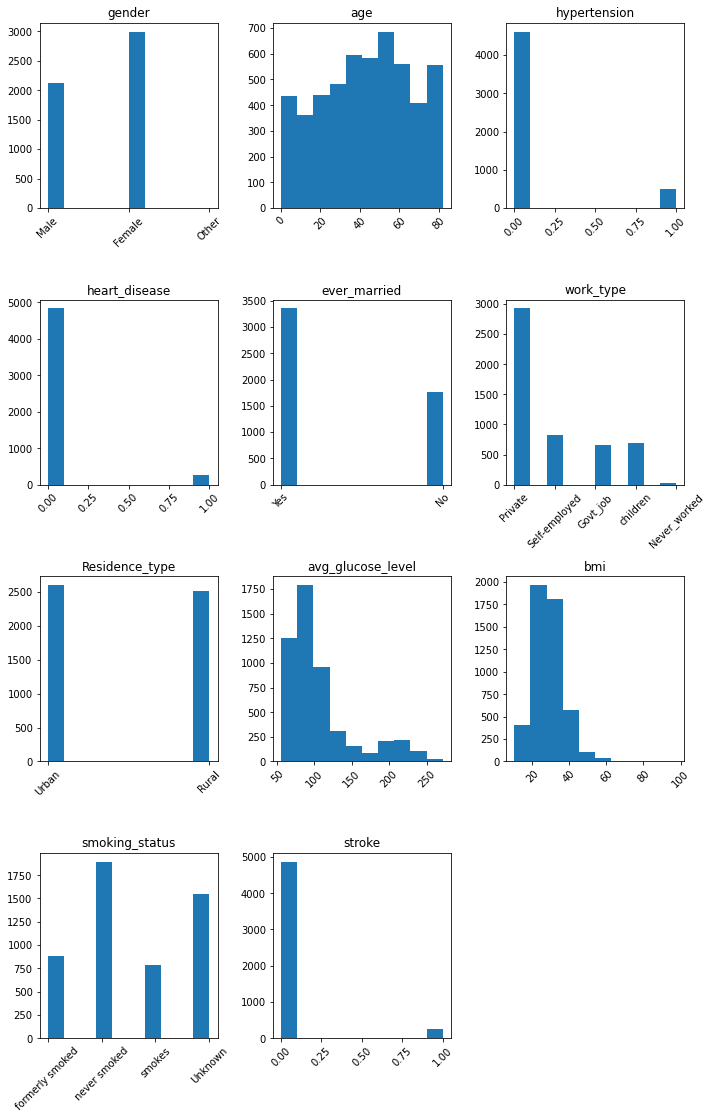

In [14]:
cols=list(df.columns)
plt.figure(figsize=(10,30))
for i in range(len(cols)):
    plt.subplot(8,3,i+1)
    plt.title(cols[i])
    plt.xticks(rotation=45)
    plt.hist(df[cols[i]])
    
plt.tight_layout()

**Stroke (imbalance)**

array([<Axes: ylabel='stroke'>], dtype=object)

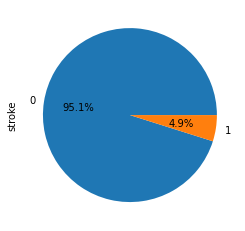

In [15]:
c=round(df['stroke'].value_counts()/df.shape[0]*100,2)
c.plot.pie(autopct='%1.1f%%',subplots=True)

**Residence Type**

array([<Axes: ylabel='Residence_type'>], dtype=object)

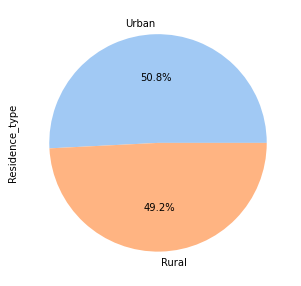

In [16]:
plt.figure(figsize=(5,5))
c=round(df['Residence_type'].value_counts()/df.shape[0]*100,2)
colors = sns.color_palette('pastel')[0:6]
c.plot.pie(autopct='%1.1f%%',subplots=True,colors=colors)

**Work Type**

<Axes: xlabel='work_type', ylabel='count'>

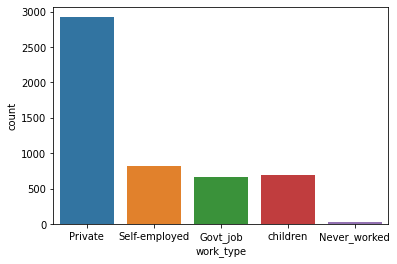

In [17]:
sns.countplot(x='work_type',data=df)


**BMI (Body Mass Index)**

* Under_weight ( BMI < 18.5 )
* Normal_weight ( 18.5 < BMI < 25 )
* Over_weight ( 25 < BMI < 30 )
* Obese ( BMI > 30 )

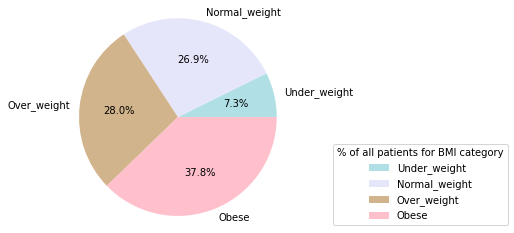

In [18]:
fig1, ax1 = plt.subplots()
ax1.pie(x=[df[df['bmi'] <= 18.5]['stroke'].value_counts()[0] , 
   df[(df['bmi'] <= 25) & (df['bmi'] > 18)]['stroke'].value_counts()[0] , 
   df[(df['bmi'] <= 30) & (df['bmi'] > 25)]['stroke'].value_counts()[0] , 
   df[df['bmi'] > 30]['stroke'].value_counts()[0] ], 
    labels=['Under_weight','Normal_weight','Over_weight','Obese'] , 
    pctdistance=0.6 , radius=6  , autopct='%1.1f%%' , 
    colors=['powderblue','lavender','tan','pink'] )

ax1.axis('equal')
plt.legend(title = "% of all patients for BMI category" , loc=1 , bbox_to_anchor=(1.5, 0.4))
plt.show() 

# Data Preprocessing

**fill the missing values in BMI**

In [19]:
df['bmi'].interpolate(inplace=True)

In [20]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
df.shape

(5110, 11)

**Outlier Check**

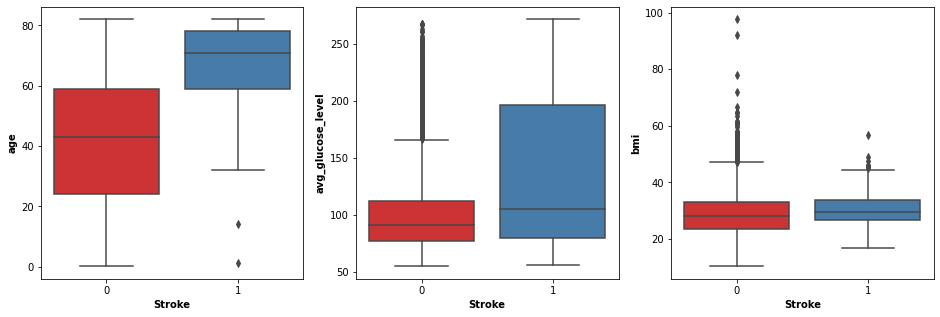

In [22]:
df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=df, ax=axs[i],  palette = 'Set1')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

**Outkier in BMI**

In [23]:
df[df['bmi']>70]['bmi'].count()

4

In [24]:
df.drop(df[df['bmi']>70].index,inplace=True)

In [25]:
df.shape

(5106, 11)

**Age**

In [26]:
df2=pd.DataFrame.copy(df)
bins=[0,10,20,30,40,50,60,70,80,90]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
df2['decade']=pd.cut(df['age'],bins=bins,labels=labels)

In [27]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,decade
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,60-70
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,1,60-70
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,70-80
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,40-50
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,70-80


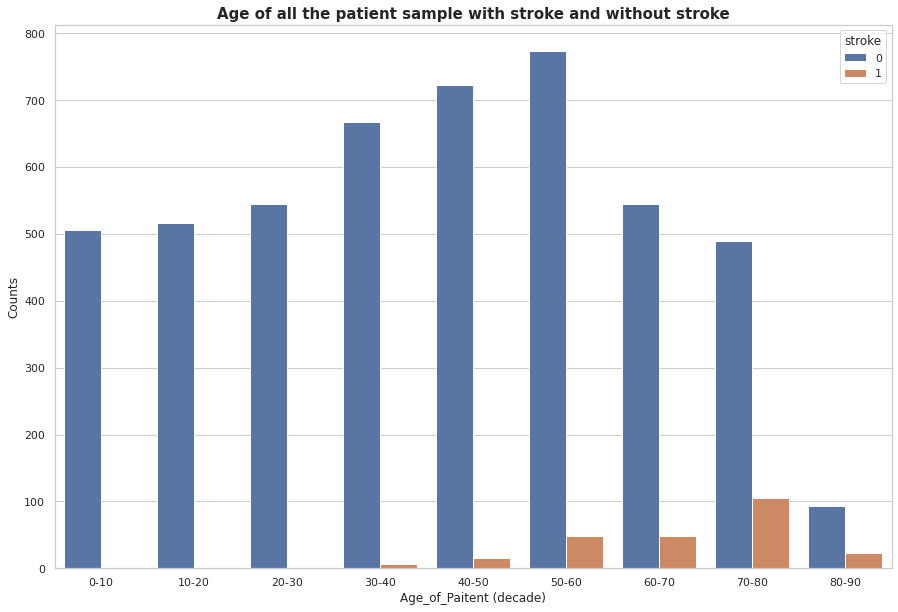

In [28]:
plt.figure(figsize=[15,10])
sns.set_theme(style="whitegrid")
sns.countplot(data=df2.sort_values('decade'),x='decade',hue='stroke',dodge=True  )
plt.title('Age of all the patient sample with stroke and without stroke' , fontsize = 15, fontweight ='bold')

plt.xlabel('Age_of_Paitent (decade)')
plt.ylabel('Counts')
plt.show()

**Correlation**

<Axes: >

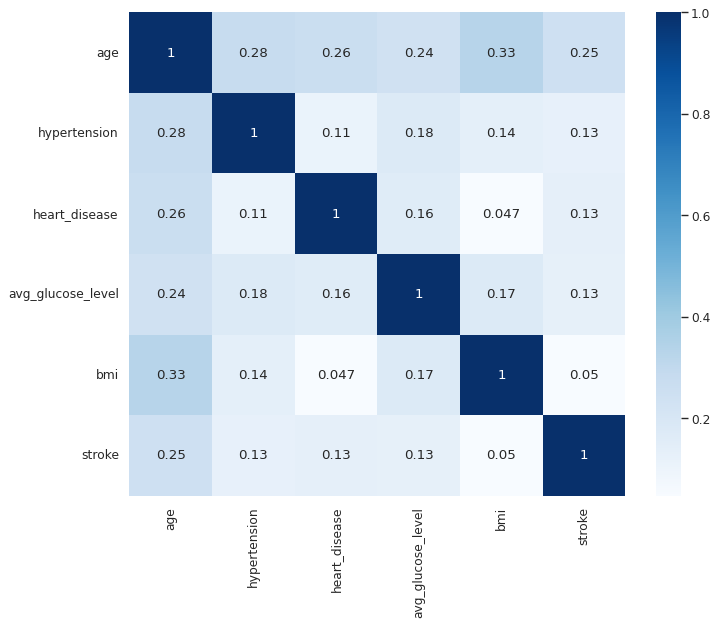

In [29]:
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(df.corr(),annot=True,cmap='Blues')

**LabelEncoder**

In [30]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
cat_columns=['gender','ever_married','work_type', 'Residence_type','smoking_status']
for col in cat_columns:
    df[col]=lb.fit_transform(df[col])

In [31]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,0,61.0,0,0,1,3,0,202.21,34.55,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00,2,1
